## Обробка цифрових зображень у просторовій області


Використано просторові фільтри із використанням Open CV. 

In [1]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

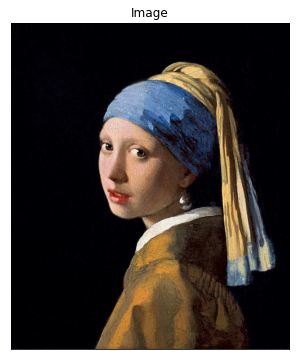

In [2]:
image_file = 'image1.jpg'
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(11,6))
plt.imshow(image)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

image_array = np.asarray(Image.open(image_file))


## Додамо на зображення шум типу сіль-перець.
#### Такий тип шуму можливо накласти лише на зображення які були переведені в GREYSCALE

In [3]:
 def add_noise(img):
 
    row , col = img.shape
     
    
    number_of_pixels = random.randint(300, 100000)
    for i in range(number_of_pixels):
       
        y_coord=random.randint(0, row - 1)
         
        x_coord=random.randint(0, col - 1)
         
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 100000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
    return img
 

img = cv2.imread(image_file,
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('noise_salt_pepper.jpg',
            add_noise(img))

True

### Фільтр середнього арифметичного

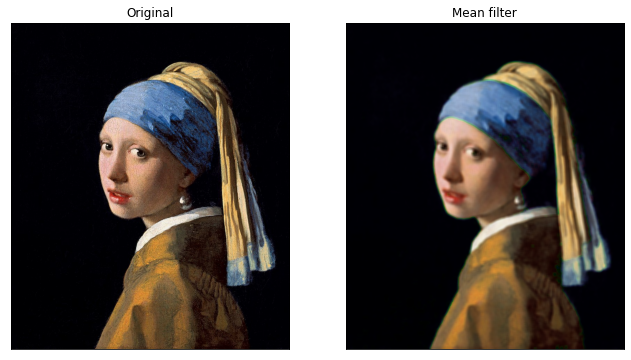

In [4]:
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV

window_size = 9
new_image = cv2.blur(image,(window_size, window_size))
plt.figure(figsize=(11,6))

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()


#### Зображення яке було завантажене раніше, мало кольорову модель RGB. Розглянемо зображення в іншій палітрі.

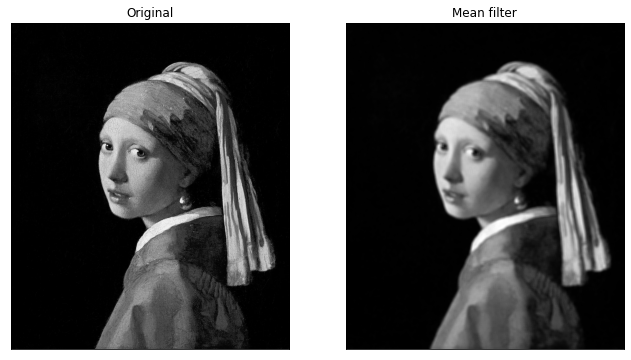

In [5]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

### Використаємо наш шум на оригінальне зображення
Використаємо шум сіль-перець для перевірки ефективності фільтрів.

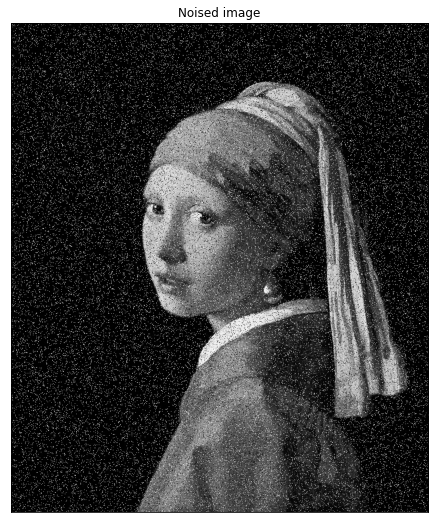

In [6]:
noised_image = 'noise_salt_pepper.jpg'
noised_image = cv2.imread(noised_image)
plt.figure(figsize=(18,9))
plt.imshow(noised_image)
plt.title('Noised image')
plt.xticks([])
plt.yticks([])
plt.show()

## Фільтр середнього арифметичного

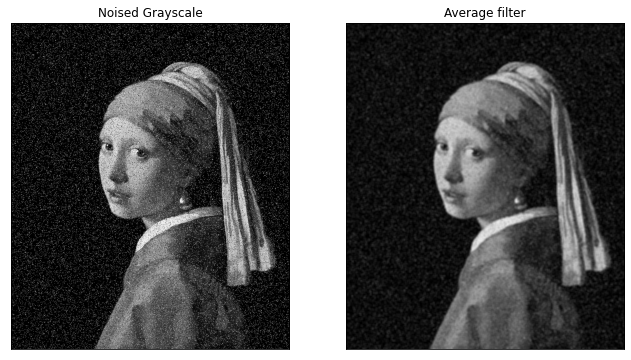

In [13]:
window_size = 7
new_image = cv2.blur(noised_image,(window_size, window_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(noised_image, cmap='gray'),plt.title('Noised Grayscale')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Average filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Медіанний фільтр

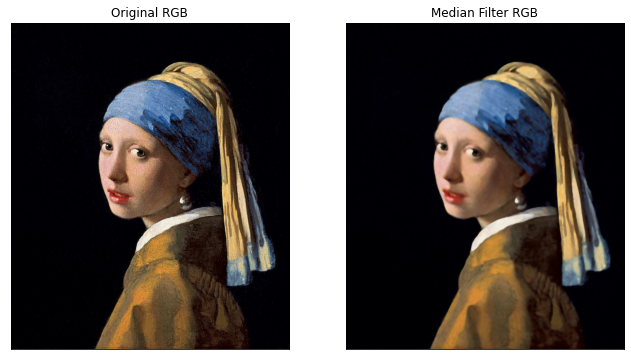

In [8]:

window_size = 7

new_image = cv2.medianBlur(image, window_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original RGB')
plt.xticks([]), plt.yticks([]) 
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter RGB')
plt.xticks([]), plt.yticks([])
plt.show()

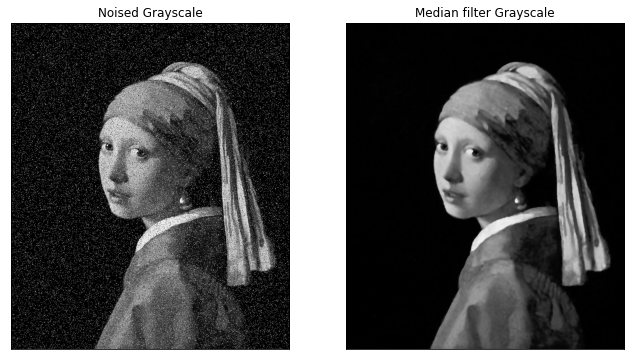

In [9]:
window_size = 7
new_image = cv2.medianBlur(noised_image,(window_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(noised_image, cmap='gray'),plt.title('Noised Grayscale')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median filter Grayscale')
plt.xticks([]), plt.yticks([])
plt.show()

## Гаусівський фільтр

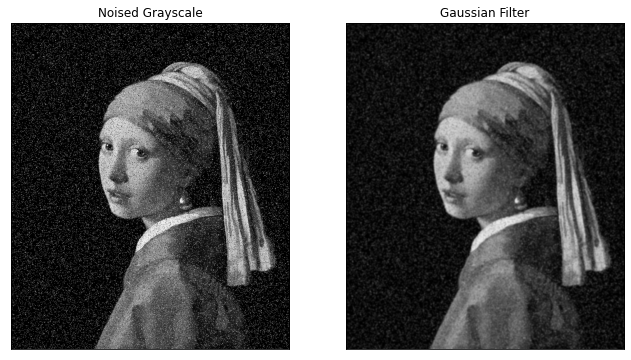

In [10]:
window_size = 9
new_image = cv2.GaussianBlur(noised_image, (window_size, window_size), 0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(noised_image, cmap='gray'),plt.title('Noised Grayscale')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Мінімальний фільтр

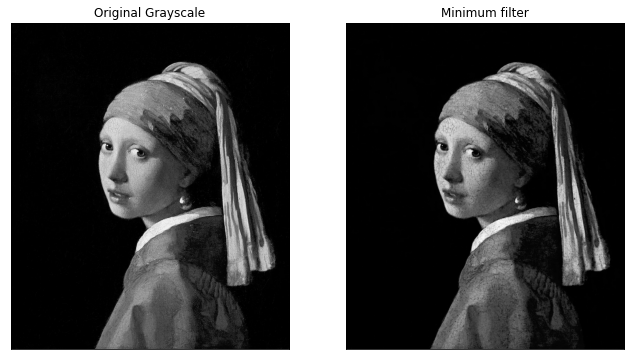

In [11]:

window_size = (3, 3)
shape = cv2.MORPH_RECT = 1
kernel = cv2.getStructuringElement(shape, window_size)
min_image = cv2.erode(image2, kernel)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original Grayscale')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(min_image, cmap='gray'),plt.title('Minimum filter')
plt.xticks([]), plt.yticks([])

plt.show()

## Максимальний фільтр

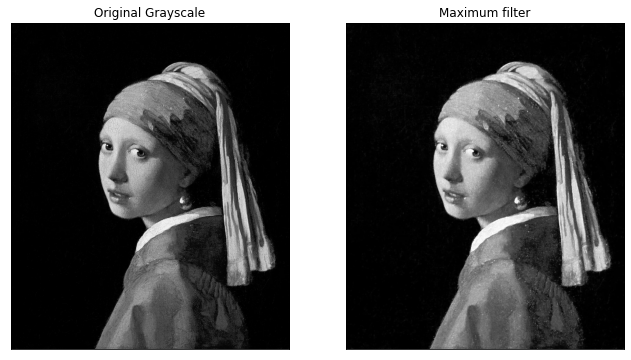

In [12]:
window_size = (3, 3)
shape = cv2.MORPH_RECT = 1
kernel = cv2.getStructuringElement(shape, window_size)
min_image = cv2.dilate(image2, kernel)
plt.figure(figsize=(11,6))


plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original Grayscale')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(min_image, cmap='gray'),plt.title('Maximum filter')
plt.xticks([]), plt.yticks([])

plt.show()